# Final Project: Experiments 1, 3, and 4

In [1]:
from torch.nn import Module
from torch import nn

import numpy as np
import os
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# Additional imports
import time
import matplotlib.pyplot as plt

In [2]:
def train_experiment_4(model):
    start_time = time.time()
    
    batch_size = 256
    train_dataset = mnist.MNIST(root='./train', train=True, transform=ToTensor())
    test_dataset = mnist.MNIST(root='./test', train=False, transform=ToTensor())
    train_loader = DataLoader(train_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    sgd = SGD(model.parameters(), lr=1e-1)
    loss_fn = CrossEntropyLoss()
    all_epoch = 20
    accs = []
    for current_epoch in range(all_epoch):
        model.train()
        for idx, (train_x, train_label) in enumerate(train_loader):
            sgd.zero_grad()
            predict_y = model(train_x.float())
            loss = loss_fn(predict_y, train_label.long())
            loss.backward()
            sgd.step()

        all_correct_num = 0
        all_sample_num = 0
        model.eval()

        for idx, (test_x, test_label) in enumerate(test_loader):
            predict_y = model(test_x.float()).detach()
            predict_y =torch.argmax(predict_y, dim=-1)
            current_correct_num = predict_y == test_label
            all_correct_num += np.sum(current_correct_num.to('cpu').numpy(), axis=-1)
            all_sample_num += current_correct_num.shape[0]
        acc = all_correct_num / all_sample_num
        accs.append(acc)
#         print(current_epoch, 'accuracy: {:.3f}'.format(acc), flush=True)
        if not os.path.isdir("models"):
            os.mkdir("models")
        torch.save(model, 'models/mnist_{:.3f}.pkl'.format(acc))
    return accs, time.time() - start_time

## Experiment 1: Visualize 

In [3]:
class Model(Module):
    def __init__(self):
        super(Model, self).__init__()
        self.in_layer = nn.Sequential(
            nn.Conv2d(1, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.out_layer = nn.Sequential(
            nn.Linear(256, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
            nn.ReLU(),
        )

    def forward(self, x):
        y = self.in_layer(x)
        y = y.view(y.shape[0], -1)
        y = self.out_layer(y)
        return y

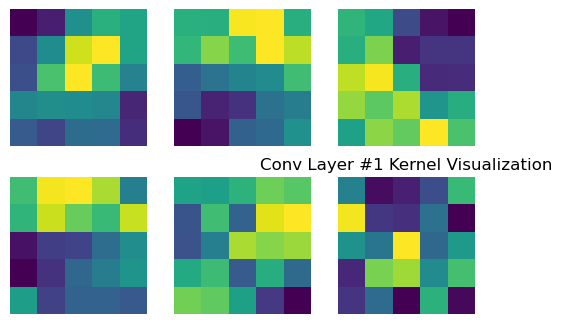

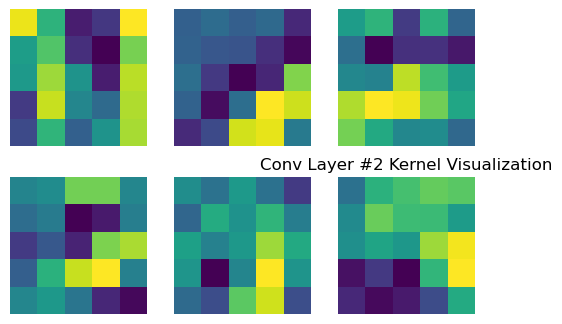

In [4]:
original_model = Model()
train_experiment_4(original_model)
weights = original_model.in_layer[0].weight.data

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 4))
for i in range(6):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(weights[i, 0, :, :], cmap='viridis')
    axs[row, col].axis('off')
plt.title('Conv Layer #1 Kernel Visualization')

weights = original_model.in_layer[3].weight.data
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 4))
for i in range(6):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(weights[i, 0, :, :], cmap='viridis')
    axs[row, col].axis('off')
plt.title('Conv Layer #2 Kernel Visualization')
plt.show();

## Experiment 3: Maxpool Tweaks

### Define Model

In [5]:
class MaxpoolModel(Module):
    def __init__(self, kernel_size, stride, padding):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=kernel_size, stride=stride, padding=padding)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=kernel_size, stride=stride, padding=padding)
        self.fc1 = nn.LazyLinear(120) 
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

### Train Model and Visualize Outputs

Repitition: 0


/Users/angelalandry/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Model 1 Accuracy: 0.9822 Time: 158.57296586036682
Model 2 Accuracy: 0.8849 Time: 132.43043398857117
Model 3 Accuracy: 0.7624 Time: 130.69143414497375
Model 4 Accuracy: 0.9783 Time: 136.79044127464294
Model 5 Accuracy: 0.4111 Time: 361.4711501598358
Model 6 Accuracy: 0.984 Time: 361.7821719646454
Model 7 Accuracy: 0.9793 Time: 125.81433510780334


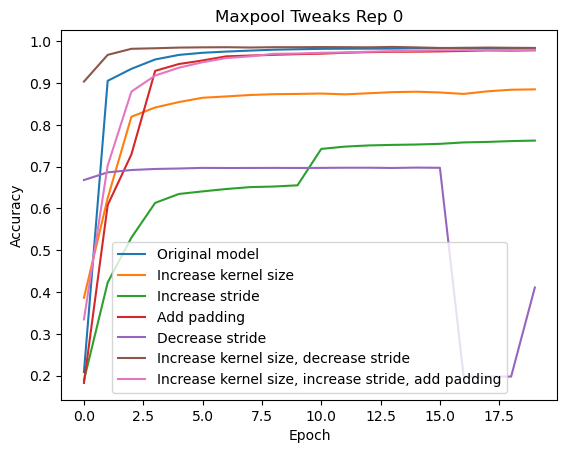

Repitition: 1
Model 1 Accuracy: 0.5884 Time: 158.16053414344788
Model 2 Accuracy: 0.9759 Time: 132.58669328689575
Model 3 Accuracy: 0.9719 Time: 130.57830119132996
Model 4 Accuracy: 0.9805 Time: 136.54608583450317
Model 5 Accuracy: 0.9865 Time: 364.12902092933655
Model 6 Accuracy: 0.098 Time: 361.49968004226685
Model 7 Accuracy: 0.9784 Time: 125.17722916603088


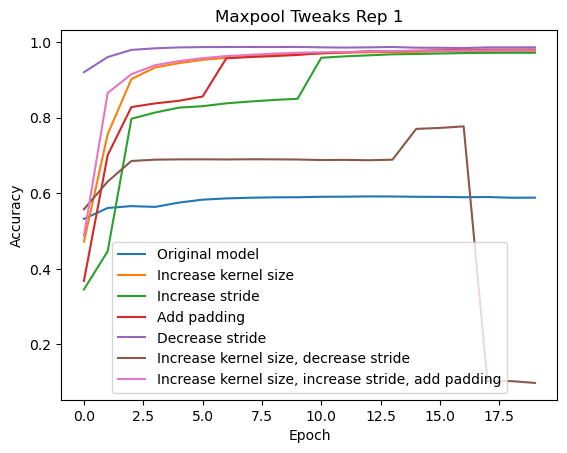

Repitition: 2
Model 1 Accuracy: 0.9813 Time: 158.91020393371582
Model 2 Accuracy: 0.8778 Time: 132.7239429950714
Model 3 Accuracy: 0.7642 Time: 130.51214718818665
Model 4 Accuracy: 0.6996 Time: 136.2126829624176
Model 5 Accuracy: 0.9833 Time: 365.1596050262451
Model 6 Accuracy: 0.9812 Time: 361.6759798526764
Model 7 Accuracy: 0.8933 Time: 125.11725807189941


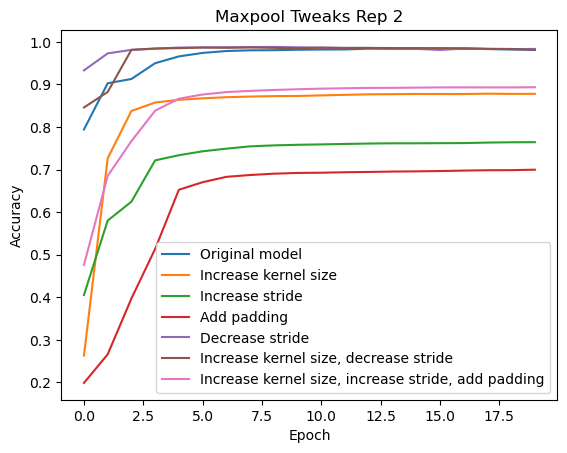

In [6]:
for rep in range(3):
    print("Repitition:", rep)
    # Default 
    model1 = MaxpoolModel(2, 2, 0)
    acc1, time1 = train_experiment_4(model1)
    print("Model 1 Accuracy:", acc1[-1], "Time:", time1)

    # Increase kernel size
    model2 = MaxpoolModel(3, 3, 0)
    acc2, time2 = train_experiment_4(model2)
    print("Model 2 Accuracy:", acc2[-1], "Time:", time2)

    # Increase stride
    model3 = MaxpoolModel(2, 3, 0)
    acc3, time3 = train_experiment_4(model3)
    print("Model 3 Accuracy:", acc3[-1], "Time:", time3)

    # Add padding
    model4 = MaxpoolModel(2, 3, 1)
    acc4, time4 = train_experiment_4(model4)
    print("Model 4 Accuracy:", acc4[-1], "Time:", time4)

    # Decrease stride
    model5 = MaxpoolModel(2, 1, 0)
    acc5, time5 = train_experiment_4(model5)
    print("Model 5 Accuracy:", acc5[-1], "Time:", time5)

    # Increase kernel size, decrease stride
    model6 = MaxpoolModel(3, 1, 0)
    acc6, time6 = train_experiment_4(model6)
    print("Model 6 Accuracy:", acc6[-1], "Time:", time6)

    # Increase kernel size, increase stride, add padding
    model7 = MaxpoolModel(3, 4, 1)
    acc7, time7 = train_experiment_4(model7)
    print("Model 7 Accuracy:", acc7[-1], "Time:", time7)

    epochs = list(range(20))
    accuracies = [acc1, acc2, acc3, acc4, acc5, acc6, acc7]
    labels = ["Original model", "Increase kernel size", "Increase stride",
             "Add padding", "Decrease stride", "Increase kernel size, decrease stride",
             "Increase kernel size, increase stride, add padding"]

    fig, ax = plt.subplots()

    assert(len(accuracies) == len(labels))
    for i in range(len(accuracies)):
        ax.plot(epochs, accuracies[i], label=labels[i])

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    title = 'Maxpool Tweaks Rep ' + str(rep)
    ax.set_title(title)
    ax.legend()

    # Show the plot
    plt.show();

## Experiment 4: Deepen the Model
### Define Models

In [7]:
# 1 Convolutional Layer
class LeNet4a(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(864, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

# 2 Convolutional Layers (Original Model)
class LeNet4b(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 120) 
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y
    
# 3 Convolutional Layers
class LeNet4c(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.conv3 = nn.Conv2d(16, 16, 3)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.fc1 = nn.LazyLinear(120) 
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = self.conv3(y)
        y = self.relu3(y)
        y = self.pool3(y) 
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

# 4 Convolutional Layers
class LeNet4d(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.conv3 = nn.Conv2d(16, 16, 3)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.conv4 = nn.Conv2d(16, 16, 3)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.fc1 = nn.LazyLinear(120) 
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = self.conv3(y)
        y = self.relu3(y)
        y = self.pool3(y) 
        y = self.conv4(y)
        y = self.relu4(y)
        y = self.pool4(y) 
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

### Train Models

Repition: 0
Model 1 Accuracy: 0.9825 Time: 128.78545784950256
Model 2 Accuracy: 0.9813 Time: 158.3032419681549
Model 3 Accuracy: 0.9787 Time: 593.229615688324
Model 4 Accuracy: 0.1135 Time: 743.4486482143402


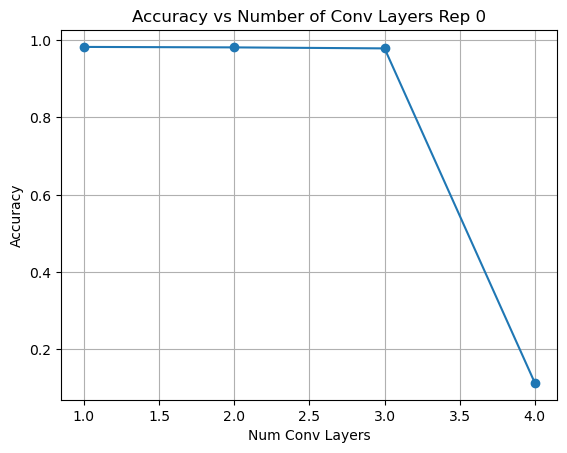

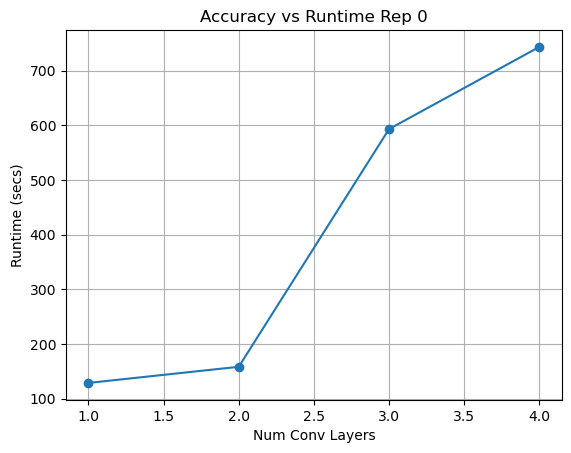

Repition: 1
Model 1 Accuracy: 0.9819 Time: 128.76019668579102
Model 2 Accuracy: 0.888 Time: 158.83209085464478
Model 3 Accuracy: 0.8861 Time: 592.9571347236633
Model 4 Accuracy: 0.098 Time: 727.9661178588867


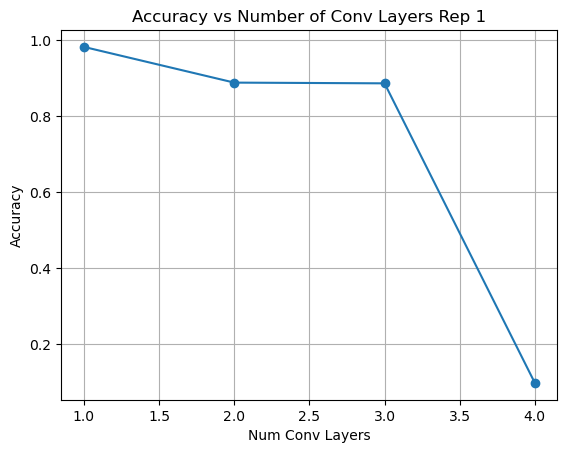

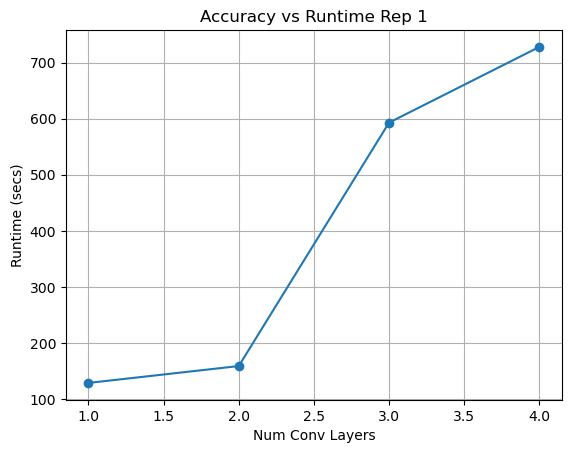

Repition: 2
Model 1 Accuracy: 0.8927 Time: 128.34396696090698
Model 2 Accuracy: 0.9797 Time: 158.84260082244873


In [ ]:
for rep in range(3):
    print("Repition:", rep)
    model1 = LeNet4a()
    acc1, time1 = train_experiment_4(model1)
    acc1 = acc1[-1]
    print("Model 1 Accuracy:", acc1, "Time:", time1)

    model2 = LeNet4b()
    acc2, time2 = train_experiment_4(model2)
    acc2 = acc2[-1]
    print("Model 2 Accuracy:", acc2, "Time:", time2)

    model3 = LeNet4c()
    acc3, time3 = train_experiment_4(model3)
    acc3 = acc3[-1]
    print("Model 3 Accuracy:", acc3, "Time:", time3)

    model4 = LeNet4d()
    acc4, time4 = train_experiment_4(model4)
    acc4 = acc4[-1]
    print("Model 4 Accuracy:", acc4, "Time:", time4)

    conv_layers = [1, 2, 3, 4]
    accuracies = [acc1, acc2, acc3, acc4]
    times = [time1, time2, time3, time4]

    plt.plot(conv_layers, accuracies, 'o-')
    plt.xlabel('Num Conv Layers')
    plt.ylabel('Accuracy')
    title = 'Accuracy vs Number of Conv Layers Rep ' + str(rep)
    plt.title(title)
    plt.grid(True)
    plt.show();

    plt.plot(conv_layers, times, 'o-')
    plt.xlabel('Num Conv Layers')
    plt.ylabel('Runtime (secs)')
    title = 'Accuracy vs Runtime Rep ' + str(rep)
    plt.title(title)
    plt.grid(True)
    plt.show();

### Visualize Results